# Gender classification using Convolutional Neural Network (ConvNet)
### 1) Import the data

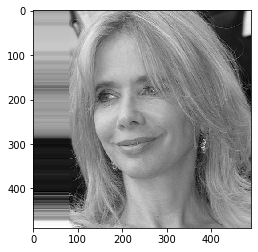

In [2]:
# First method: using cv2

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

DATADIR = "data/train/"
CATEGORIES = ['female', 'male']

IMG_SIZE = 256

data = list()

# load the data
for category in CATEGORIES:
    path= os.path.join(DATADIR,category) # path to male of female dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

        
        

In [4]:
print(img_array.shape)

(489, 490)


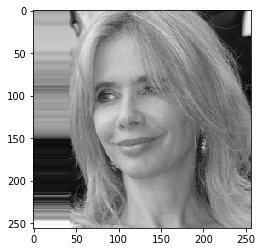

In [9]:
IMG_SIZE = 256
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
data = list()

# load the data
for category in CATEGORIES:
    path= os.path.join(DATADIR,category) # path to male of female dir
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            data.append([new_array, class_num])
        except Exception as e:
            pass
        



In [ ]:
# Shuffle the data 

import random 

random.shuffle(data)

# Save your data 
import pickle

data_pickle = open("./data/data_shuffled.pickle", "wb")
pickle.dump(data, data_pickle)
data_pickle.close()


# split the data into train/test



# Divide the data into features and labels
X = []
y = []


for features, label in data:
    X.append(features)
    y.append(label)
    
    
# reshape the data

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



### Second  method: using tensrflow

In [ ]:
!pip install --upgrade tensorflow

In [2]:
# import libraries
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow import *
print(tf.__version__)
print("Done!")

2.7.0
Done!


In [1]:
print("Done!")

Done!


In [14]:
###### 1) Upload dataset from directories
DATADIR = "data/train/"
CATEGORIES = ['female', 'male']

IMG_SIZE = 256
batch_size= 32 # Others batch sizes 64, 128, and 256.

ds_train = tf.keras.preprocessing.image_dataset_from_directory(DATADIR,
                                                               labels="inferred",
                                                               label_mode = "binary", # int or categorical
                                                               class_names = ["female", "male"],
                                                               color_mode ="grayscale",
                                                               batch_size = batch_size,
                                                               image_size = (IMG_SIZE,IMG_SIZE), # reshape if not in this size
                                                               shuffle = True,
                                                               seed= 123, # to maintain the same data when spliyying the data
                                                               validation_split = 0.2,
                                                               subset = "training",
)


ds_validation = tf.keras.preprocessing.image_dataset_from_directory(DATADIR,
    labels="inferred",
    label_mode = "binary", # int or categorical
    class_names = ["female", "male"],
    color_mode ="grayscale",
    batch_size = batch_size,
    image_size = (IMG_SIZE,IMG_SIZE), # reshape if not in this size
    shuffle = True,
    seed= 123, # to maintain the same results for different runs and data when splitting the data 
    validation_split = 0.2,
    subset = "validation",
)

print("Done!")

Found 14000 files belonging to 2 classes.
Using 11200 files for training.
Found 14000 files belonging to 2 classes.
Using 2800 files for validation.


In [9]:
ds_train

<BatchDataset shapes: ((None, 256, 256, 1), (None, 1)), types: (tf.float32, tf.float32)>

In [11]:
##### 2) Second method: using ImageDataGenerator (for data augumentation) and flow_from_directory
DATADIR = "data/train/"
CATEGORIES = ['female', 'male']

IMG_SIZE = 256
batch_size= 32 # Others batch sizes 64, 128, and 256.

In [12]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 5,
    zoom_range = (0.95, 0.95),
    horizontal_flip = False, #False by default
    vertical_flip= False, 
    data_format = "channels_last",
    validation_split = 0.02,
    dtype= tf.float32,
)


train_generator = datagen.flow_from_directory(
    DATADIR,
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'binary',
    shuffle = True,
    subset = 'training',
    seed = 123


) 


val_generator = datagen.flow_from_directory(
    DATADIR,
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'binary',
    shuffle = True,
    subset = 'validation',
    seed = 123


) 

print("Done!")

Found 13720 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [ ]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE # Search for this 
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

print("Done!")

#### Model :

The model consists of three blocks of Conv2D and MaxPool2D layers (the base) followed by a head of Dense layers.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]), # Please recheck the type of your input images
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

In [ ]:
# Model with data augumentation

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.InputLayer(input_shape=[128, 128, 3]),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor=0.10),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),
    
    #preprocessing.RandomContrast(factor=0.3),
   # preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right
    #preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
    #preprocessing.RandomWidth(factor=0.15), # horizontal stretch
   # preprocessing.RandomRotation(factor=0.20),
    #preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),

    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


# Compile and fit the model 
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

# Plot learning curves
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [ ]:
# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

model.fit(ds_train,
          epochs=2,
          validation_data=ds_test,
          callbacks = [tboard_callback])

In [ ]:
# Train the model

model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=40,
    verbose=0,
)

In [ ]:
# Visualise the training loss
# The commands below to plot the loss and metric curves for this training run.
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();